In [72]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pylab as plt

def Decision_Surface(data, target, model=None, surface=True, probabilities=True, cell_size=.01):
    '''
    This function creates the surface of a decision tree using the data created with this script. 
    You can change this function tu plot any column of any dataframe. 
    
    INPUT: data (created with data_tools.X() ),
            target (Y value creted with data_tools.create_data() ),
            model (Model already fitted with X and Y , i.e. DecisionTreeClassifier or logistic regression )
            surface (True if we want to display the tree surface),
            probabilities (False by default, if True we can see the color-scale based on the likelihood of being closer to the separator),
           cell_size (value for the step of the numpy arange that creates the mesh)
    RETURNS: Scatterplot with/without the surface
    '''
    # Get bounds, we only have 2 columns in the dataframe: column 0 and column 1 
    x_min, x_max = data[data.columns[0]].min(), data[data.columns[0]].max()
    y_min, y_max = data[data.columns[1]].min(), data[data.columns[1]].max()
    
    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, cell_size), np.arange(y_min, y_max, cell_size))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    
    # Add interactions
    for i in range(data.shape[1]):
        if i <= 1:
            continue

        meshed_data = np.c_[meshed_data, np.power(xx.ravel(), i)]

    if model != None:
        # Predict on the mesh with labels or probability
        if probabilities:
            Z = model.predict_proba(meshed_data)[:, 1].reshape(xx.shape)
        else:
            Z = model.predict(meshed_data).reshape(xx.shape)
    
    # Plot mesh and data
    if data.shape[1] > 2:
        # Higher orders
        plt.title("humor^(" + str(range(1,data.shape[1])) + ") and number_pets")
    else:
        plt.title("humor and number_pets")
    plt.xlabel("humor")
    plt.ylabel("number_pets")
    if surface and model != None:
        if probabilities:
            # Color-scale on the contour (surface = separator)
            cs = plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
        else:
            # Only a curve/line on the contour (surface = separator)
            cs = plt.contourf(xx, yy, Z, levels=[-1,0,1],cmap=plt.cm.coolwarm, alpha=0.4)
    color = ["blue" if t == 0 else "red" for t in target]
    plt.scatter(data[data.columns[0]], data[data.columns[1]], color=color)

def create_data(n_users = 300,n_informative=2,seed = 456):
    '''
    This function creates a data set with 3 random normal distributions scaled. 
    There are two main variables in this dataset: humor and number_pets.
    It also computes higher orders for the 'humor' variable (^2, ^3 and ^4).
    You can change this function with new orders or column names.
   
    RETURNS: target_name (always "success"), 
             variable_names (always ["humor", "number_pets"] ), 
             data  (dataframe with the data WITHOUT higher orders), 
             Y (target variable with values 0 or 1)
    '''
    # Set the randomness
    np.random.seed(seed)

    # Number of users
    #n_users = 200

    # Relationships
    variable_names = ["humor", "number_pets"]
    target_name = "success"

    # Generate data (3 random normal distributions!!!!)
    #a = np.random.normal(5, 5, n_users )
    #b = np.random.normal(10, 5, n_users )
    #c = np.random.normal(20, 5, n_users )

    # Change scales
    #x1 = list(a+10) + list(c+10) + list(b+10)
    #x2 = list((b+10)/10) + list((b+10)/10) + list((c+10)/10)
    #target = list(np.ones(len(b))) + list(np.ones(len(b))) + list(np.zeros(len(b)))

    predictors, target = datasets.make_classification(n_features=2, n_redundant=0, 
                                                  n_informative=n_informative, n_clusters_per_class=2,
                                                  n_samples=n_users)
    
    #data = pd.DataFrame(np.c_[x1, x2], columns=variable_names)
    data = pd.DataFrame(predictors, columns=variable_names)

    # Add interactions
    data['humor^2'] = np.power(data['humor'], 2)
    data['humor^3'] = np.power(data['humor'], 3)
    data['humor^4'] = np.power(data['humor'], 4)

    data[target_name] = target
    Y = data[target_name]
    return target_name, variable_names, data, Y

def X(seed,complexity=1, data = None):
    '''
    This function return the X-data from the 'create_data' function of this script.
    You can change the complexity to receive the main 2 columns + complex orders.
    
    INPUT: complexity (higher complexity (1 to 4) for the 'humor' variable)
    RETURNS: data  (dataframe with the data WITH higher orders IF required)
    '''
    if data is None:
        target_name, variable_names, data, Y = create_data(seed=seed)
    # remove the target variable
    drops = ["success"]
    
    # if complexity = 1 then we just need to drop all the higher order from the dataframe
    for i in [2, 3, 4]:
        # based on the number of complexity required, we drop the rest of the higher orders
        if i > complexity:
            drops.append("humor^" + str(i))
    
    return data.drop(drops, 1)

#target_name, variable_names, data, Y = create_data()

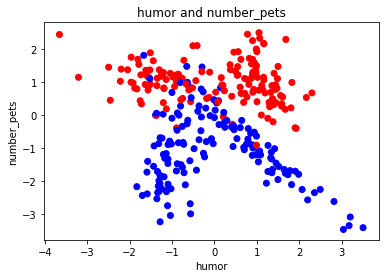

In [107]:
np.random.seed(33)
predictors, target = datasets.make_classification(n_features=2, n_redundant=0, 
                                                  n_informative=2, n_clusters_per_class=2,
                                                  n_samples=300)

variable_names = ["humor", "number_pets"]
target_name = "success"
data = pd.DataFrame(predictors, columns=variable_names)
Decision_Surface(data, target, model = None)

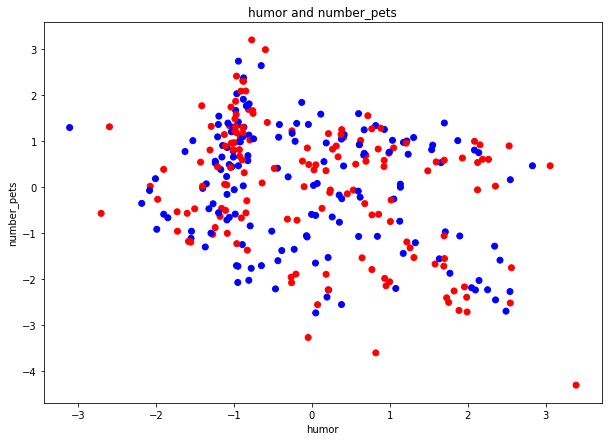

In [86]:
# Get some data: The create_data() function returns 4 variables:
target_name, variable_names, data, Y = create_data(seed=11)

# Grab the predictors (rows and columns)
x = X()
plt.figure(figsize=[10,7])
Decision_Surface(x, Y, None, surface=False)

In [117]:
predictors, target = datasets.make_classification(n_features=2, n_redundant=0, 
                                                  n_informative=2, n_clusters_per_class=4,
                                                  n_samples=450)

ValueError: n_classes * n_clusters_per_class must be smaller or equal 2 ** n_informative

In [123]:
a = np.random.normal(5, 5, 10 )
aa = a * a
aa

array([1.67168816e+01, 4.85758240e+00, 1.03622713e+02, 5.33561320e+01,
       1.98504893e+02, 2.52380542e+01, 5.96292307e-02, 3.20062921e-01,
       2.78952128e+01, 3.58144958e+01])

In [126]:
np.linspace(1,5,5)

array([1., 2., 3., 4., 5.])

In [133]:
data['humor']*data['humor']



0      1.446640e+00
1      6.140282e-01
2      1.303354e+00
3      9.853107e-01
4      1.789389e-01
5      7.973394e-01
6      1.250985e+00
7      2.459471e+00
8      2.829256e-01
9      3.338084e+00
10     2.475888e+00
11     2.616703e+00
12     2.252323e+00
13     4.838526e+00
14     1.462935e+00
15     1.370684e+00
16     1.187017e+00
17     1.219281e+00
18     6.031388e+00
19     3.254560e+00
20     2.393902e+00
21     3.265440e+00
22     6.994910e-02
23     1.803357e+00
24     2.178881e+00
25     2.094364e+00
26     6.219483e-01
27     1.699446e+00
28     1.768460e+00
29     2.796305e+00
           ...     
270    7.668265e-01
271    1.861578e+00
272    3.867102e+00
273    1.103424e-04
274    2.920622e-07
275    7.596717e-01
276    9.549535e-01
277    4.059330e-01
278    1.750411e+00
279    4.248071e-01
280    2.569381e-01
281    6.985044e-03
282    2.078235e+00
283    1.641344e+00
284    3.175986e+00
285    3.904944e-01
286    2.019030e+00
287    2.528295e+00
288    3.084535e-01
